In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.datasets import make_blobs, load_breast_cancer, load_iris
from sklearn.linear_model import LinearRegression, LogisticRegression
import pandas as pd
!pip install autograd
import autograd.numpy as np
from autograd import grad

techSalaries2017 = pd.read_csv("techSalaries2017.csv")


techSalaries2017['gender'].replace("Female", 0,inplace=True)
techSalaries2017['gender'].replace("Male", 1,inplace=True)
techSalaries2017['gender'].replace("Other", 2,inplace=True)

data = techSalaries2017[['totalyearlycompensation','yearsofexperience', 'yearsatcompany',
       'gender', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic',
       'Age', 'Height', 'Zodiac', 'SAT', 'GPA']]


data1 = data[(~techSalaries2017["Education"].isna()) & (~techSalaries2017["Race"].isna()) & (~techSalaries2017["gender"].isna())]

dfclean = data1.drop(["Highschool", "Race_Hispanic"], axis=1)

numpy_data = dfclean.to_numpy()
numpy_data = np.vstack(numpy_data[:, :]).astype(np.float)

data_standard = (numpy_data - np.mean(numpy_data, axis=0)) / np.std(numpy_data, axis=0)

y = data_standard[:,0]
x = data_standard[:,1:]
print(x)


[[-0.36291129  0.69075847  0.44533136 ...  0.73081134  0.79887085
   0.49315658]
 [-0.70495104 -0.21154452  0.44533136 ...  1.60046234  0.87550893
   0.60092582]
 [-0.19189141  0.99152613  0.44533136 ... -1.58825799  1.6674357
   1.5708489 ]
 ...
 [ 1.51830735 -0.21154452 -2.10240297 ...  1.31057868  3.19168186
   3.11554123]
 [ 2.5444266  -0.21154452  0.44533136 ...  0.44092768  3.7536944
   3.40292585]
 [ 1.68932722 -0.81307985  0.44533136 ... -1.29837432  2.46787782
   2.07377199]]


0.2664310482734512
[ 0.38873899 -0.05787782  0.01650421  0.12761381  0.04508191  0.1606874
  0.00609807  0.0012076   0.01395277  0.02476346 -0.00199744 -0.00321604
 -0.00592532  0.01245678  0.25862935  0.01413572]


Text(0.5, 1.0, 'R^2 = 0.266')

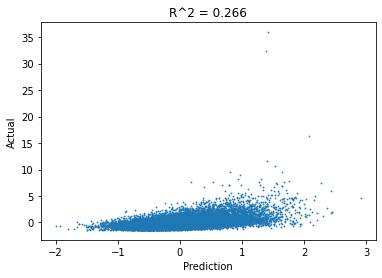

In [2]:
model = LinearRegression().fit(x,y)
rSqr = model.score(x,y)
print(rSqr)
print(model.coef_)

b0, b1 = model.intercept_, model.coef_

yHat = model.predict(x)
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction') 
plt.ylabel('Actual')  
plt.title('R^2 = {:.3f}'.format(rSqr))



0.1621539669648403


Text(0.5, 1.0, 'R^2 Years of relevant experience = 0.162')

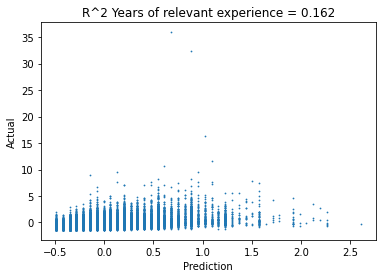

In [3]:
model = LinearRegression().fit(x[:,:1], y)
rsqr = model.score(x[:,:1], y)
print(rsqr)

yHat = model.predict(x[:,:1])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("R^2 Years of relevant experience = {:.3f}".format(rsqr))

0.028191183842718348


Text(0.5, 1.0, 'R^2 Time with this company = 0.028')

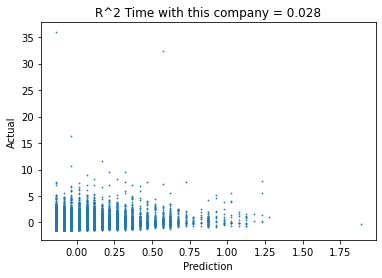

In [4]:
model = LinearRegression().fit(x[:,1:2], y)
rsqr = model.score(x[:,1:2], y)
print(rsqr)

yHat = model.predict(x[:,1:2])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("R^2 Time with this company = {:.3f}".format(rsqr))

0.0016603326759979664


Text(0.5, 1.0, 'R^2 Gender = 0.002')

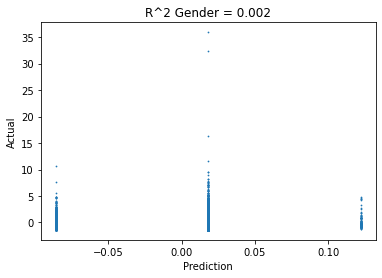

In [5]:
model = LinearRegression().fit(x[:,2:3], y)
rsqr = model.score(x[:,2:3], y)
print(rsqr)

yHat = model.predict(x[:,2:3])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("R^2 Gender = {:.3f}".format(rsqr))

0.009757263794016202


Text(0.5, 1.0, 'R^2 Terminal Degree is Masters = 0.010')

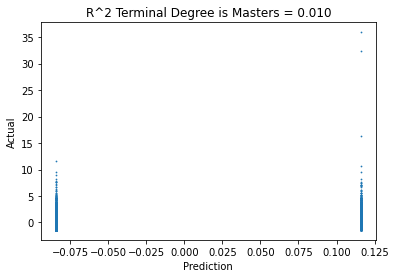

In [6]:
model = LinearRegression().fit(x[:,3:4], y)
rsqr = model.score(x[:,3:4], y)
print(rsqr)

yHat = model.predict(x[:,3:4])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("R^2 Terminal Degree is Masters = {:.3f}".format(rsqr))

0.023998021217556453


Text(0.5, 1.0, 'R^2 Terminal Degree is Bachelors = 0.024')

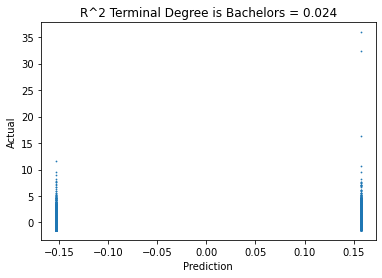

In [7]:
model = LinearRegression().fit(x[:,4:5], y)
rsqr = model.score(x[:,4:5], y)
print(rsqr)

yHat = model.predict(x[:,4:5])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("R^2 Terminal Degree is Bachelors = {:.3f}".format(rsqr))

0.01971258587025182


Text(0.5, 1.0, 'R^2 Terminal Degree is Doctorate = 0.020')

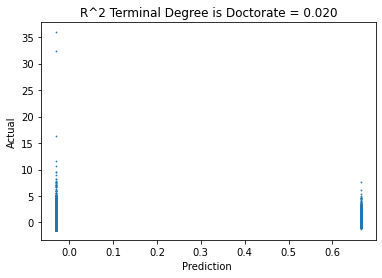

In [8]:
model = LinearRegression().fit(x[:,5:6], y)
rsqr = model.score(x[:,5:6], y)
print(rsqr)

yHat = model.predict(x[:,5:6])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Terminal Degree is Doctorate = {:.3f}".format(rsqr))

0.00018344025573258094


Text(0.5, 1.0, 'R^2 Terminal Degree is High School = 0.000')

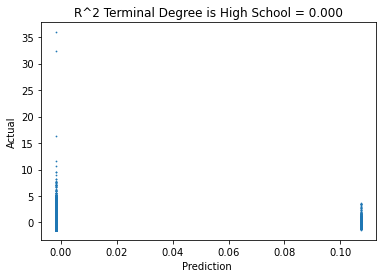

In [9]:
model = LinearRegression().fit(x[:,6:7], y)
rsqr = model.score(x[:,6:7], y)
print(rsqr)

yHat = model.predict(x[:,6:7])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Terminal Degree is High School = {:.3f}".format(rsqr))

0.0013710364515200357


Text(0.5, 1.0, 'R^2 Terminal Degree is some college = 0.001')

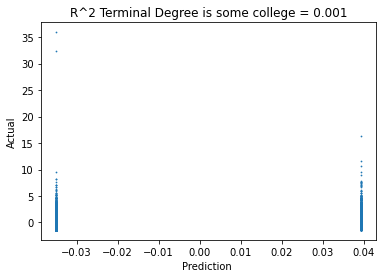

In [10]:
model = LinearRegression().fit(x[:,7:8], y)
rsqr = model.score(x[:,7:8], y)
print(rsqr)

yHat = model.predict(x[:,7:8])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Terminal Degree is some college = {:.3f}".format(rsqr))

0.0021677040220815513


Text(0.5, 1.0, 'R^2 Self-identifies as Asian = 0.002')

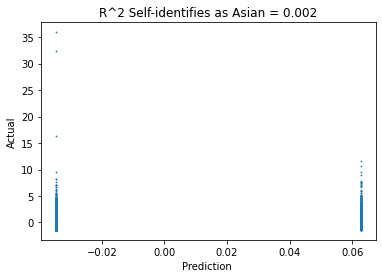

In [11]:
model = LinearRegression().fit(x[:,8:9], y)
rsqr = model.score(x[:,8:9], y)
print(rsqr)

yHat = model.predict(x[:,8:9])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Self-identifies as Asian = {:.3f}".format(rsqr))

0.00014999555268946363


Text(0.5, 1.0, 'R^2 Self-identifies as White = 0.000')

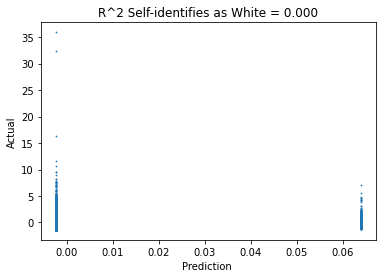

In [12]:
model = LinearRegression().fit(x[:,9:10], y)
rsqr = model.score(x[:,9:10], y)
print(rsqr)

yHat = model.predict(x[:,9:10])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Self-identifies as White = {:.3f}".format(rsqr))

0.0005062151469270582


Text(0.5, 1.0, 'R^2 Self-identifies as Multi-Racial = 0.001')

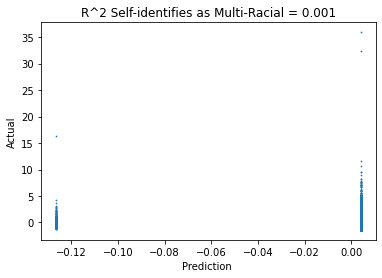

In [13]:
model = LinearRegression().fit(x[:,10:11], y)
rsqr = model.score(x[:,10:11], y)
print(rsqr)

yHat = model.predict(x[:,10:11])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Self-identifies as Multi-Racial = {:.3f}".format(rsqr))

0.06476556189247806


Text(0.5, 1.0, 'R^2 Self-identifies as Black = 0.065')

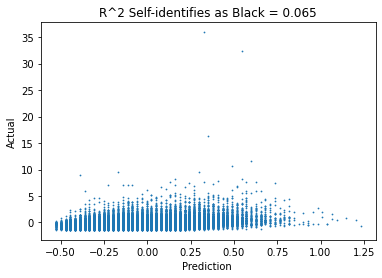

In [14]:
model = LinearRegression().fit(x[:,11:12], y)
rsqr = model.score(x[:,11:12], y)
print(rsqr)

yHat = model.predict(x[:,11:12])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Self-identifies as Black = {:.3f}".format(rsqr))

0.00013837830193841327


Text(0.5, 1.0, 'R^2 Self-identifies as Hispanic = 0.000')

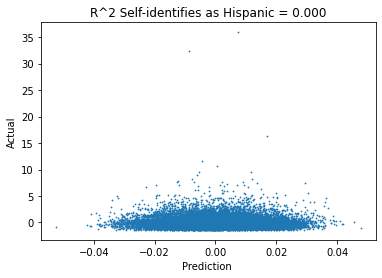

In [15]:
model = LinearRegression().fit(x[:,12:13], y)
rsqr = model.score(x[:,12:13], y)
print(rsqr)

yHat = model.predict(x[:,12:13])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Self-identifies as Hispanic = {:.3f}".format(rsqr))

7.636755779627524e-05


Text(0.5, 1.0, 'R^2 Age = 0.000')

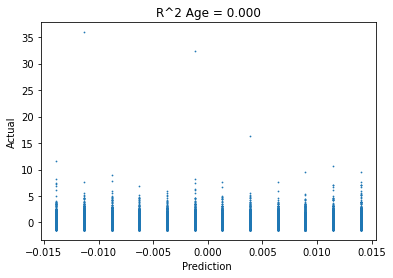

In [16]:
model = LinearRegression().fit(x[:,13:14], y)
rsqr = model.score(x[:,13:14], y)
print(rsqr)

yHat = model.predict(x[:,13:14])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Age = {:.3f}".format(rsqr))

0.11068237413365922


Text(0.5, 1.0, 'R^2 Height = 0.111')

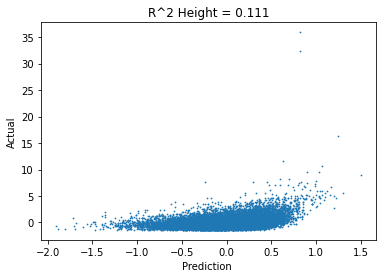

In [17]:
model = LinearRegression().fit(x[:,14:15], y)
rsqr = model.score(x[:,14:15], y)
print(rsqr)

yHat = model.predict(x[:,14:15])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Height = {:.3f}".format(rsqr))

0.09322155411607791


Text(0.5, 1.0, 'R^2 Zodiac sign = 0.093')

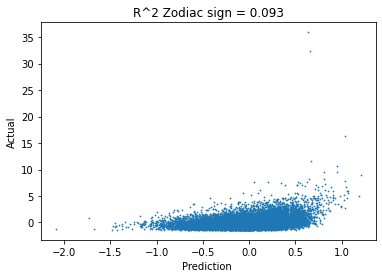

In [18]:
model = LinearRegression().fit(x[:,15:16], y)
rsqr = model.score(x[:,15:16], y)
print(rsqr)

yHat = model.predict(x[:,15:16])
plt.plot(yHat, y, "o", markersize=0.75)
plt.xlabel("Prediction ")
plt.ylabel("Actual")
plt.title("R^2 Zodiac sign = {:.3f}".format(rsqr))

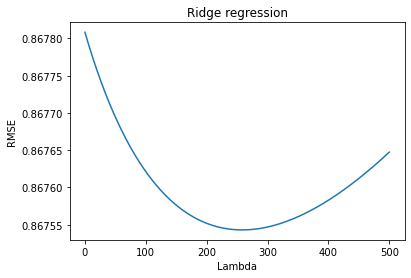

Optimal lambda: 258.5
r-squared:  0.26627410061636525


In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=0)
lambdas = np.linspace(0,500,1001)
cont = np.empty([len(lambdas),2])*np.NaN 
for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])

opt_lam = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
ridge = Ridge(alpha = opt_lam).fit(x, y)
print("r-squared: ", ridge.score(x, y))

C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1428.1348646115512, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1666.7746328222565, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1905.4144010334276, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8110.048374617007, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8348.688142835046, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8587.32791104645, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWar

C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14791.961884622957, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15030.601652838523, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15269.241421052022, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21699.89447564814, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21920.690632203263, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22141.486788758375, tolerance: 1.673400032498147
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ashley\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

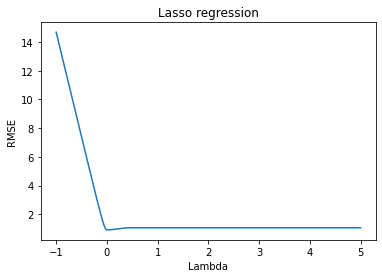

Optimal lambda: 0.0020000000000000018
r-squared:  0.2662560068769294


In [20]:
from sklearn.linear_model import Lasso

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)
lambdas = np.linspace(-1,5,1001)
cont = np.empty([len(lambdas),2])*np.NaN 

for ii in range(len(lambdas)):
    ridgeModel = Lasso(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Lasso regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])
opt_lam = lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))]
lasso = Lasso(alpha = opt_lam).fit(x, y)
print("r-squared: ", lasso.score(x, y))

In [21]:
dfclean.drop(dfclean.index[data1['gender'] == 2], inplace=True)

dfclean = dfclean.dropna()
y = dfclean['gender'].to_numpy().astype(np.float)
x = dfclean[["totalyearlycompensation"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)






Accuracy = 42.9%
Confusion matrix = 
[[ 573  249]
 [2206 1269]]


In [22]:

dfclean['high_vs_low'] = (dfclean['totalyearlycompensation'] > dfclean['totalyearlycompensation'].median()).astype(int)


y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["yearsofexperience", "Age", "Height", "SAT", "GPA"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)



Accuracy = 67.5%
Confusion matrix = 
[[1644  526]
 [ 872 1255]]


In [23]:

dfclean['high_vs_low'] = (dfclean['totalyearlycompensation'] > dfclean['totalyearlycompensation'].median()).astype(int)


y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["yearsofexperience"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)



Accuracy = 64.2%
Confusion matrix = 
[[1653  517]
 [1023 1104]]


In [24]:
y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["Age"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)



Accuracy = 58.6%
Confusion matrix = 
[[1310  860]
 [ 919 1208]]


In [25]:
y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["Height"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)


Accuracy = 50.6%
Confusion matrix = 
[[1105 1065]
 [1057 1070]]


In [26]:
y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["SAT"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)


Accuracy = 60.3%
Confusion matrix = 
[[1188  982]
 [ 724 1403]]


In [27]:
y = dfclean['high_vs_low'].to_numpy().astype(np.float)
x = dfclean[["GPA"]].to_numpy().astype(np.float)
y_standard = (y - np.mean(y, axis=0)) / np.std(y, axis=0)
x_standard = (x - np.mean(x, axis=0)) / np.std(x, axis=0)

X_train, X_test, y_train, y_test = train_test_split(x_standard, y_standard, test_size=0.2, random_state=0)

model = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
model.fit(X_train.astype("int"), y_train.astype("int"))


pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test.astype("int"), pred) 
print("Accuracy = {:0.1f}%".format(accuracy * 100))

conf_matrix = metrics.confusion_matrix(y_test.astype("int"), pred)
print("Confusion matrix = ")
print(conf_matrix)


Accuracy = 58.7%
Confusion matrix = 
[[1167 1003]
 [ 773 1354]]


AxesSubplot(0.125,0.125;0.775x0.755)


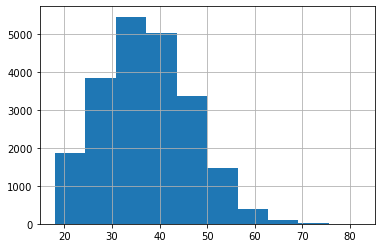

In [28]:
print(data1['Age'].hist())

AxesSubplot(0.125,0.125;0.775x0.755)


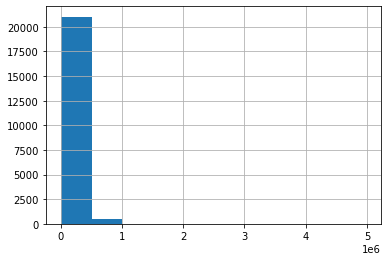

In [29]:
print(data1['totalyearlycompensation'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


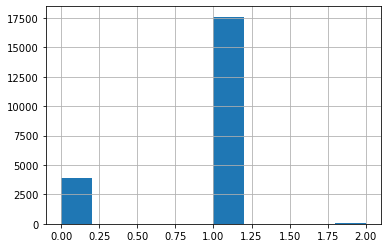

In [30]:
print(data1['gender'].hist())